<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/loss_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 737.73 KiB | 4.50 MiB/s, done.


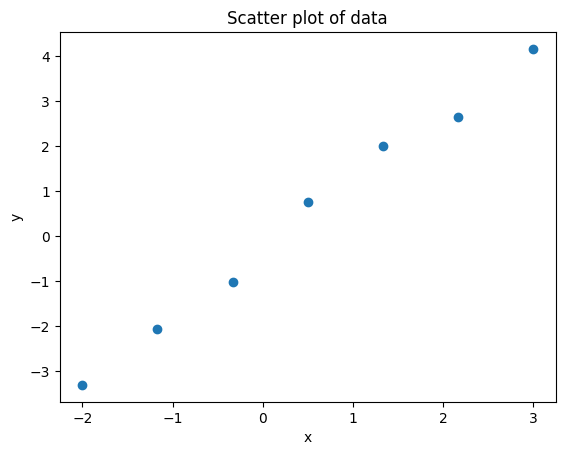

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv('./deepLearning/nn/points7.csv')

x = data['x']
y = data['y']

plt.scatter(x=x,y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()


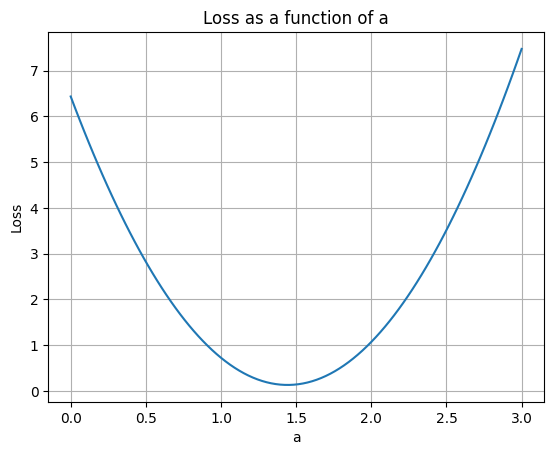

In [3]:
import numpy as np

a_values = np.linspace(0, 3, 100)

# Calculate loss for each a value
loss_values = []
for a in a_values:
    loss = np.mean((a * x - y) ** 2)  # Calculate the mean squared loss
    loss_values.append(loss)

# Plot the loss values
plt.plot(a_values, loss_values)
plt.xlabel('a')
plt.ylabel('Loss')
plt.title('Loss as a function of a')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

def loss_fn(x: np.ndarray, y: np.ndarray, a: float) -> float:
    loss = np.mean((a * x - y) ** 2)
    return loss

a = 3.0
h = 0.001

print(loss_fn(x,y,a))
print(loss_fn(x,y,a+h))
print(loss_fn(x,y,a-h))

7.47173131231991
7.4811641554628405
7.462304524732537


In [5]:
import torch

# Convert x and y to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

a_tensor = torch.tensor(3.0, requires_grad=True)

for idx in range(10):
    loss = torch.mean((a_tensor * x_tensor - y_tensor) ** 2)
    grad = loss.backward()
    print(f"a value: {a_tensor.item()}, dl/da :  {a_tensor.grad}" )
    with torch.no_grad():
        a_tensor -= 0.1 * a_tensor.grad

    # Reset gradients
    a_tensor.grad.zero_()



a value: 3.0, dl/da :  9.429816246032715
a value: 2.057018280029297, dl/da :  3.7195372581481934
a value: 1.6850645542144775, dl/da :  1.4671509265899658
a value: 1.5383495092391968, dl/da :  0.5787095427513123
a value: 1.4804785251617432, dl/da :  0.22826877236366272
a value: 1.4576516151428223, dl/da :  0.09003896266222
a value: 1.4486477375030518, dl/da :  0.03551575168967247
a value: 1.4450961351394653, dl/da :  0.014008680358529091
a value: 1.443695306777954, dl/da :  0.005526029039174318
a value: 1.4431426525115967, dl/da :  0.0021789169404655695
